<a href="https://colab.research.google.com/github/GNANASAMBANTHAN/GNANASAMBANTHAN/blob/main/Mini_Project_3_HR_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import scipy.stats as stats
import traceback
import re
import os
import math
from tabulate import tabulate
from datetime import datetime
from collections import Counter
import pandas as pd
import requests
import json
import pandas as pd

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_Interactivity = "all"

Schema (i.e., columns in the data set):
Satisfaction_level                
Last_evaluation           
Number_project        
Average_montly_hours        
Time_spend_company      
Work_accident     
Left        
Promotion_last_5years       
Sales     
Salary

Run pandas profiling [ref] for the dataset

In [ ]:
import pandas as pd
! pip install pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 31.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a13bf580e9fc1d7b704875050efe04083437e41fac7ff44053c057577b2c7de6
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
df = pd.read_csv("/content/HR_comma_sep.csv")
df.head(5)
print(tabulate(df.head(5), headers='keys', tablefmt='grid', showindex=True))

+----+----------------------+-------------------+------------------+------------------------+----------------------+-----------------+--------+-------------------------+---------+----------+
|    |   satisfaction_level |   last_evaluation |   number_project |   average_montly_hours |   time_spend_company |   Work_accident |   left |   promotion_last_5years | sales   | salary   |
+====+======================+===================+==================+========================+======================+=================+========+=========================+=========+==========+
|  0 |                 0.38 |              0.53 |                2 |                    157 |                    3 |               0 |      1 |                       0 | sales   | low      |
+----+----------------------+-------------------+------------------+------------------------+----------------------+-----------------+--------+-------------------------+---------+----------+
|  1 |                 0.8  |              0.

***Department in this document means the column "sales".***     
1. How many employees in each of the department (use column "sales")

In [ ]:
dept_employee_count = df.groupby('sales').size().reset_index(name='num_employees')
dept_employee_count.insert(0, 'Dept_id', range(1, 1 + len(dept_employee_count)))
print("Department-wise Employee Counts")
print(tabulate(dept_employee_count, headers='keys', tablefmt='grid', showindex=False))

Department-wise Employee Counts
+-----------+-------------+-----------------+
|   Dept_id | sales       |   num_employees |
+===========+=============+=================+
|         1 | IT          |            1227 |
+-----------+-------------+-----------------+
|         2 | RandD       |             787 |
+-----------+-------------+-----------------+
|         3 | accounting  |             767 |
+-----------+-------------+-----------------+
|         4 | hr          |             739 |
+-----------+-------------+-----------------+
|         5 | management  |             630 |
+-----------+-------------+-----------------+
|         6 | marketing   |             858 |
+-----------+-------------+-----------------+
|         7 | product_mng |             902 |
+-----------+-------------+-----------------+
|         8 | sales       |            4140 |
+-----------+-------------+-----------------+
|         9 | support     |            2229 |
+-----------+-------------+-----------------+
| 

2. Among employees who left, get the department wise (use column "sales"), number of employees and rank them.

In [ ]:
left_employees_department = df[df['left'] == 1].groupby('sales').size().reset_index(name='num_employees')
left_employees_department['rank'] = left_employees_department['num_employees'].rank(ascending=False)
left_employees_department.insert(0, 'Dept_id', range(1, len(left_employees_department) + 1))
print("\nDepartment-wise Employee Counts of employees who left and their rank")
print(tabulate(left_employees_department, headers='keys', tablefmt='plain', showindex=False))


Department-wise Employee Counts of employees who left and their rank
  Dept_id  sales          num_employees    rank
        1  IT                       273       4
        2  RandD                    121       9
        3  accounting               204       6
        4  hr                       215       5
        5  management                91      10
        6  marketing                203       7
        7  product_mng              198       8
        8  sales                   1014       1
        9  support                  555       3
       10  technical                697       2


3. Average number of years (time_spend_company) and average number of monthly hours (average_monthly_hours) for the employees left and not left under each department. Sort the value by sales.

In [ ]:
avg_time_hours = df.groupby(['sales', 'left']).agg(
    avg_time_spend_company=('time_spend_company', 'mean'),
    avg_average_monthly_hours=('average_montly_hours', 'mean')
).reset_index()
heatmap_data = avg_time_hours.pivot(index='sales', columns='left', values=['avg_time_spend_company', 'avg_average_monthly_hours'])
heatmap_data_reset = heatmap_data.reset_index()
heatmap_data_reset.insert(0, 'Dept_id', range(1, len(heatmap_data_reset) + 1))
print("\nHeatmap Data for Average Time Spent and Monthly Hours by Department and Left Status")
print(tabulate(heatmap_data_reset, headers='keys', tablefmt='pipe', showindex=False))


Heatmap Data for Average Time Spent and Monthly Hours by Department and Left Status
|   ('Dept_id', '') | ('sales', '')   |   ('avg_time_spend_company', 0) |   ('avg_time_spend_company', 1) |   ('avg_average_monthly_hours', 0) |   ('avg_average_monthly_hours', 1) |
|------------------:|:----------------|--------------------------------:|--------------------------------:|-----------------------------------:|-----------------------------------:|
|                 1 | IT              |                         3.35639 |                         3.86081 |                            198.887 |                            213.85  |
|                 2 | RandD           |                         3.25225 |                         4       |                            198.952 |                            210.975 |
|                 3 | accounting      |                         3.42451 |                         3.79412 |                            199.037 |                            207.029 |
|    

4. Under each department, what is the minimum and maximum for both left and not left employees related to time_spend_company and average_monthly_hours. Sort the value by sales.

In [ ]:
min_max_time_hours = df.groupby(["left", "sales"]).agg(
    min_time_spend_company=("time_spend_company", "min"),
    max_time_spend_company=("time_spend_company", "max"),
    min_average_montly_hours=("average_montly_hours", "min"),
    max_average_montly_hours=("average_montly_hours", "max")
).reset_index()
min_max_time_hours_sorted = min_max_time_hours.sort_values(by="sales")
min_max_time_hours_sorted.insert(0, 'Dept_id', range(1, len(min_max_time_hours_sorted) + 1))
print("\nMinimum and Maximum Time Spent and Monthly Hours by Department and Left Status")
print(tabulate(min_max_time_hours_sorted, headers='keys', tablefmt='fancy_grid', showindex=False))



Minimum and Maximum Time Spent and Monthly Hours by Department and Left Status
╒═══════════╤════════╤═════════════╤══════════════════════════╤══════════════════════════╤════════════════════════════╤════════════════════════════╕
│   Dept_id │   left │ sales       │   min_time_spend_company │   max_time_spend_company │   min_average_montly_hours │   max_average_montly_hours │
╞═══════════╪════════╪═════════════╪══════════════════════════╪══════════════════════════╪════════════════════════════╪════════════════════════════╡
│         1 │      0 │ IT          │                        2 │                       10 │                         96 │                        287 │
├───────────┼────────┼─────────────┼──────────────────────────┼──────────────────────────┼────────────────────────────┼────────────────────────────┤
│         2 │      1 │ IT          │                        2 │                        6 │                        127 │                        308 │
├───────────┼────────┼────

5. Under each department, what is the minimum, maximum, average on last evaluation (last_evaluation) and satisfaction level (satisfaction_level) for both left and not left. Sort the value by sales.


In [ ]:
eval_satisfaction_stats = df.groupby(["sales", "left"]).agg(
    min_last_evaluation=("last_evaluation", "min"),
    max_last_evaluation=("last_evaluation", "max"),
    avg_last_evaluation=("last_evaluation", "mean"),
    min_satisfaction_level=("satisfaction_level", "min"),
    max_satisfaction_level=("satisfaction_level", "max"),
    avg_satisfaction_level=("satisfaction_level", "mean")
).reset_index()
eval_satisfaction_stats_sorted = eval_satisfaction_stats.sort_values(by="sales")
eval_satisfaction_stats_sorted.insert(0, 'Dept_id', range(1, len(eval_satisfaction_stats_sorted) + 1))
print("\nEvaluation and Satisfaction Statistics by Department and Left Status")
print(tabulate(eval_satisfaction_stats_sorted, headers='keys', tablefmt='fancy_grid', showindex=False))


Evaluation and Satisfaction Statistics by Department and Left Status
╒═══════════╤═════════════╤════════╤═══════════════════════╤═══════════════════════╤═══════════════════════╤══════════════════════════╤══════════════════════════╤══════════════════════════╕
│   Dept_id │ sales       │   left │   min_last_evaluation │   max_last_evaluation │   avg_last_evaluation │   min_satisfaction_level │   max_satisfaction_level │   avg_satisfaction_level │
╞═══════════╪═════════════╪════════╪═══════════════════════╪═══════════════════════╪═══════════════════════╪══════════════════════════╪══════════════════════════╪══════════════════════════╡
│         1 │ IT          │      0 │                  0.37 │                     1 │              0.71305  │                     0.12 │                     1    │                 0.67717  │
├───────────┼─────────────┼────────┼───────────────────────┼───────────────────────┼───────────────────────┼──────────────────────────┼──────────────────────────┼────────

6. Under each department, what is the total count (sum) on work accidents (work_accident) and promotion for the last 5 years (promotion_last_5years) for both left and not left. Sort the value by sales.

In [ ]:
accident_promotion_stats = df.groupby(["left", "sales"]).agg(
    count_work_accident=("Work_accident", "sum"),
    count_promotion_last_5years=("promotion_last_5years", "sum")
).reset_index()
accident_promotion_stats_sorted = accident_promotion_stats.sort_values(by="sales")
accident_promotion_stats_sorted.insert(0, 'Dept_id', range(1, len(accident_promotion_stats_sorted) + 1))
print("\nCount of Work Accidents and Promotions by Department and Left Status")
print(tabulate(accident_promotion_stats_sorted, headers='keys', tablefmt='fancy_grid', showindex=False))


Count of Work Accidents and Promotions by Department and Left Status
╒═══════════╤════════╤═════════════╤═══════════════════════╤═══════════════════════════════╕
│   Dept_id │   left │ sales       │   count_work_accident │   count_promotion_last_5years │
╞═══════════╪════════╪═════════════╪═══════════════════════╪═══════════════════════════════╡
│         1 │      0 │ IT          │                   155 │                             0 │
├───────────┼────────┼─────────────┼───────────────────────┼───────────────────────────────┤
│         2 │      1 │ IT          │                     9 │                             3 │
├───────────┼────────┼─────────────┼───────────────────────┼───────────────────────────────┤
│         3 │      0 │ RandD       │                   124 │                            27 │
├───────────┼────────┼─────────────┼───────────────────────┼───────────────────────────────┤
│         4 │      1 │ RandD       │                    10 │                             0 │


7. Bring the output from question 3-6 above

In [ ]:
a1 = avg_time_hours
a2 = min_max_time_hours
a3 = eval_satisfaction_stats
a4 = accident_promotion_stats
merged_df = pd.merge(a1, a2, on=['sales', 'left'])
merged_df = pd.merge(merged_df, a3, on=['sales', 'left'])
merged_df = pd.merge(merged_df, a4, on=['sales', 'left'])
print("\nMerged DataFrame with all statistics")
print(tabulate(merged_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Merged DataFrame with all statistics
╒═════════════╤════════╤══════════════════════════╤═════════════════════════════╤══════════════════════════╤══════════════════════════╤════════════════════════════╤════════════════════════════╤═══════════════════════╤═══════════════════════╤═══════════════════════╤══════════════════════════╤══════════════════════════╤══════════════════════════╤═══════════════════════╤═══════════════════════════════╕
│ sales       │   left │   avg_time_spend_company │   avg_average_monthly_hours │   min_time_spend_company │   max_time_spend_company │   min_average_montly_hours │   max_average_montly_hours │   min_last_evaluation │   max_last_evaluation │   avg_last_evaluation │   min_satisfaction_level │   max_satisfaction_level │   avg_satisfaction_level │   count_work_accident │   count_promotion_last_5years │
╞═════════════╪════════╪══════════════════════════╪═════════════════════════════╪══════════════════════════╪══════════════════════════╪═════════════════════

8. Using output from the question 7 above, plot them as a grouped bar chart (similar to this or see group bar chart below) with seaborn. There must be two bars, one bar representing left and another for not left. This plot is for each unique department values in column “sales.”

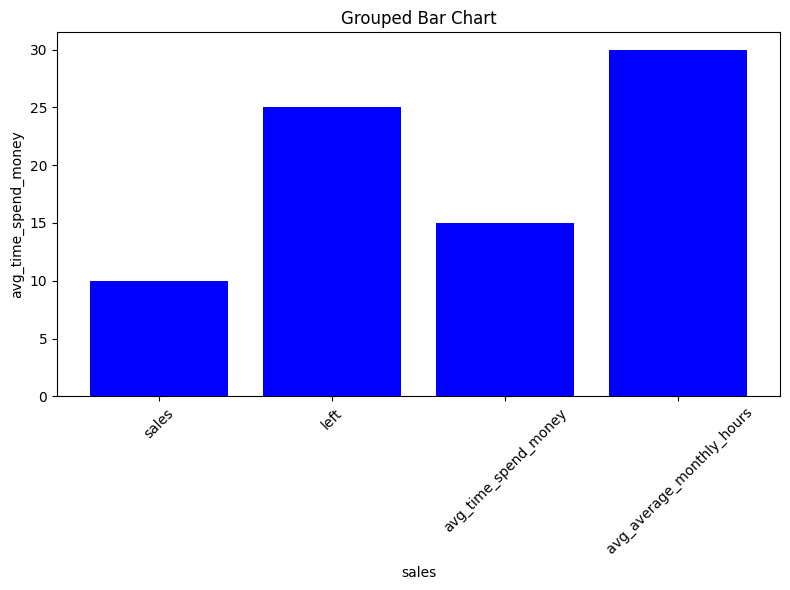

In [2]:
import matplotlib.pyplot as plt
data = {
    "IT": 10,
    "left": 25,
    "avg_time_spend_money": 15,
    "avg_average_monthly_hours": 30
}
sales = list(data.keys())
avg_time_spend_money = list(data.values())
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color="blue")
plt.title("Grouped Bar Chart")
plt.xlabel("sales")
plt.ylabel("avg_time_spend_money")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

9. For output of 3, plot heat map as shown in the image following with the numbers. One approach is to use seaborn.